# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Долотов Никита Андреевич и Зазуля Илья Анатольевич. Вариант №5.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Линейное сглаживание по 5-ти точкам:
$$y(n) = \frac{1}{5}(x_{n-2}+x_{n-1}+x_{n}+x_{n+1}+x_{n+2})$$
$$H(\omega) = \frac{1}{5}(1+2cos(\omega)+2cos(2\omega))$$

Линейное сглаживание по 9-ти точкам:
$$y(n) = \frac{1}{9}(x_{n-4}+x_{n-3}+x_{n-2}+x_{n-1}+x_{n}+x_{n+1}+x_{n+2}+x_{n+3}+x_{n+4})$$
$$H(\omega) = \frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$$

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:
$$y(n)= \frac{1}{2}(s_{n+1}-s_{n-1})$$
$$H(\omega)=isin(\omega)$$

Дискретный фильтр, соответствующий численному интегрированию прямоугольников:
$$y_{n+1}=y_n + s_{n+\frac{1}{2}}$$
$$H(\omega)=\cfrac{1}{2\cdot i \cdot sin(\frac{1}{2} \omega)}$$

Дискретный фильтр, соответствующий численному интегрированию трапеций:
$$y_{n+1}=y_n + \frac{1}{2}(s_n + s_{n+1})$$
$$H(\omega)=\cfrac{cos(\frac{1}{2}\omega)}{2 \cdot i \cdot sin(\frac{1}{2}\omega)}$$

Дискретный фильтр, соответствующий численному интегрированию Симпсона:
$$y_{n+1}=y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$$
$$H(\omega)=\cfrac{2 + cos(\omega)}{3 \cdot i \cdot sin(\omega)}$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [204]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)  # Результат будет одинаковым при каждом запуске

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

In [205]:
N = 31
NumPoints = N + 1
T = 1.0

t_discrete = np.linspace(0, N, NumPoints)
t_analog = np.linspace(0, N, N * 1000 + 1)

omegas = np.linspace(0, np.pi, 11)
amplitudes = np.random.randint(1, 12, size=11)
amplitudes_norm = amplitudes / np.sum(amplitudes)
phases = np.random.uniform(0, 0.5, size=11)

x_discrete = np.sum(amplitudes_norm * np.cos(np.outer(t_discrete, omegas) + phases), axis=1)
x_analog = np.sum(amplitudes_norm * np.cos(np.outer(t_analog, omegas) + phases), axis=1)

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

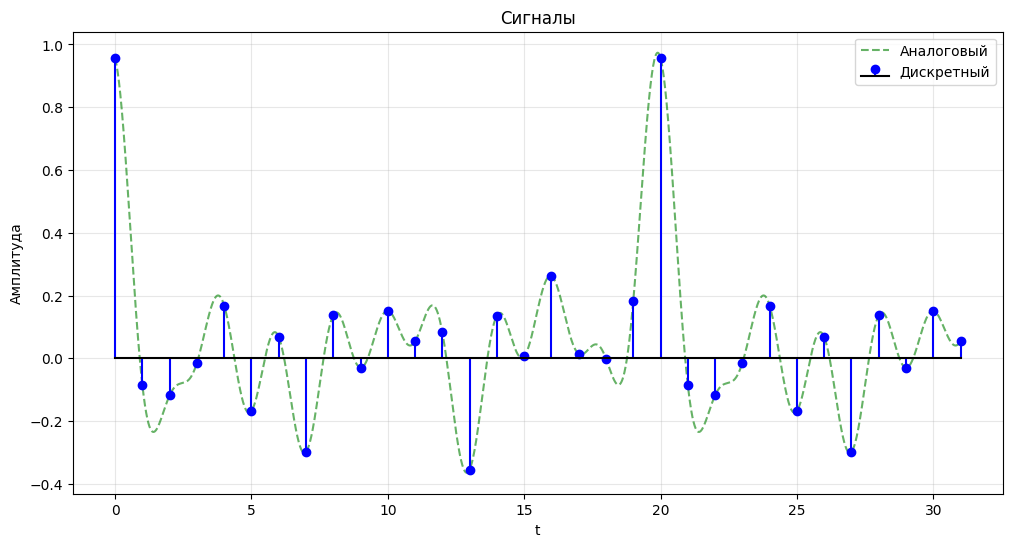

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(t_analog, x_analog, 'g--', alpha=0.6, label='Аналоговый')
plt.stem(t_discrete, x_discrete, linefmt='b-', markerfmt='bo', basefmt='k-', label='Дискретный')

plt.title('Сигналы')
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

In [207]:
k = np.arange(NumPoints)
n = np.arange(NumPoints)
W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / NumPoints)
spectrum = W @ x_discrete

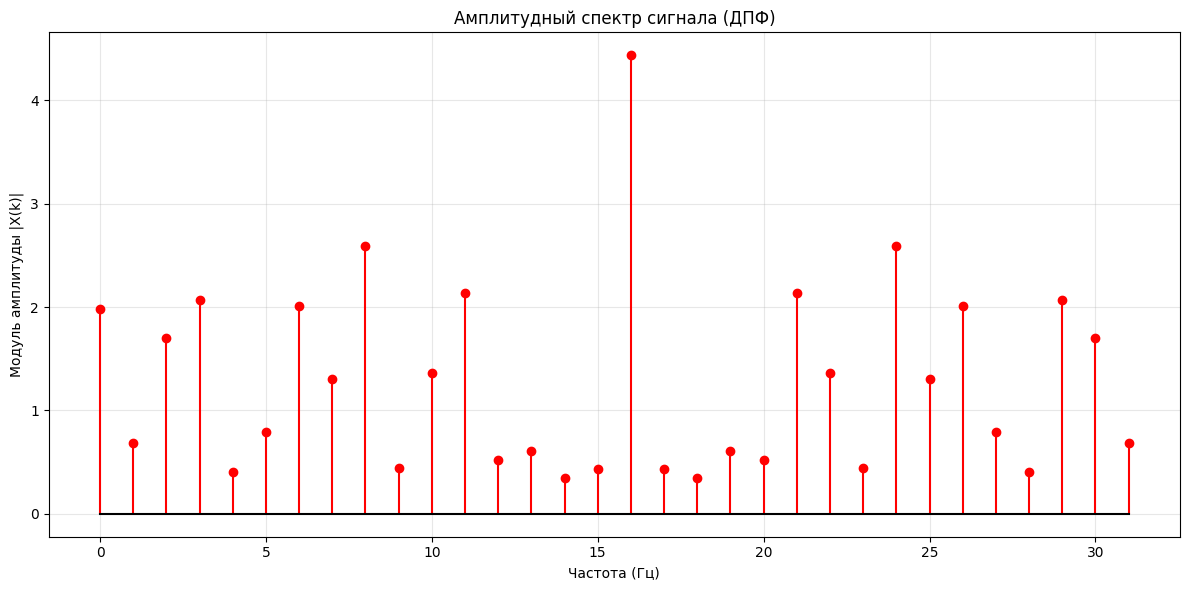

In [208]:
plt.figure(figsize=(12, 6))

plt.stem(np.abs(spectrum), linefmt='r-', markerfmt='ro', basefmt='k-')

plt.title('Амплитудный спектр сигнала (ДПФ)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Модуль амплитуды |X(k)|')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

Найдем частотную характеристику фильтров $H(\omega)$:

$$H_5(\omega)=\sum_{n=-2}^{2}e^{-j\omega n} = \frac{1}{5}(1+2cos(\omega)+2cos(2\omega))$$

$$H_9(\omega)=\sum_{n=-4}^{4}e^{-j\omega n} = \frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$$

In [209]:
h5 = np.ones(5) / 5
y5 = np.convolve(x_discrete, h5, mode='same')

h9 = np.ones(9) / 9
y9 = np.convolve(x_discrete, h9, mode='same')

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

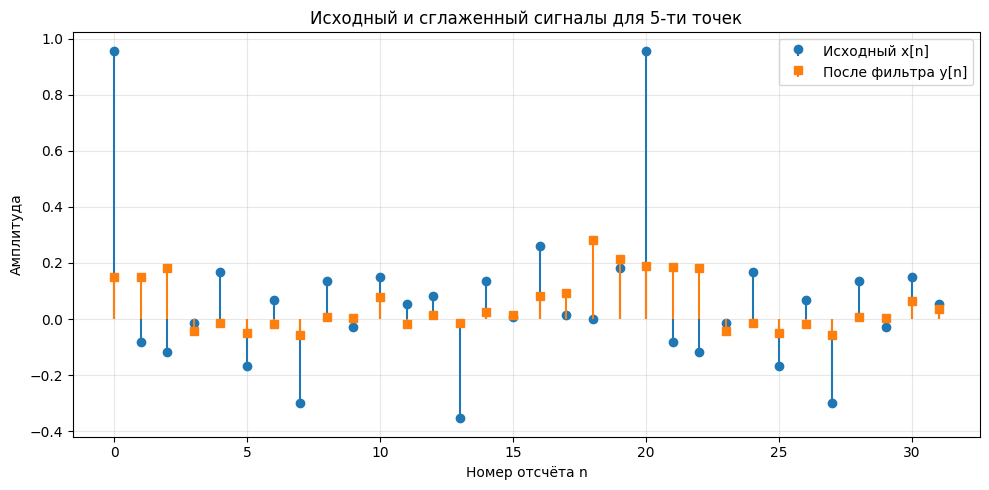

In [210]:
plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы для 5-ти точек')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y5, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

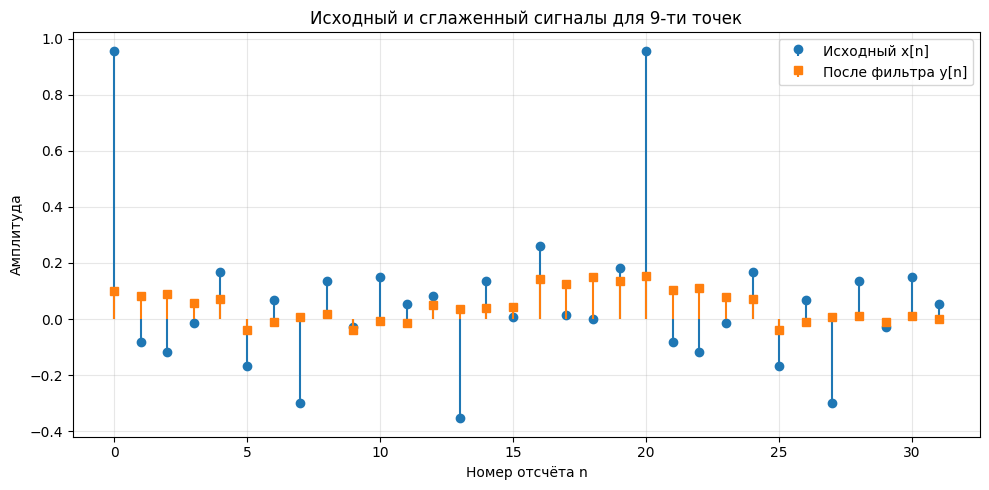

In [211]:
plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы для 9-ти точек')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y9, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [212]:
n = np.arange(NumPoints)
k = np.arange(NumPoints)
W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / NumPoints)

X = W @ x_discrete    # спектр исходного сигнала
Y_5 = W @ y5      # спектр отфильтрованного сигнала по 5-ти точкам
Y_9 = W @ y9      # спектр отфильтрованного сигнала по 9-ти точкам

X_mag = np.abs(X)
Y_5_mag = np.abs(Y_5)
Y_9_mag = np.abs(Y_9)

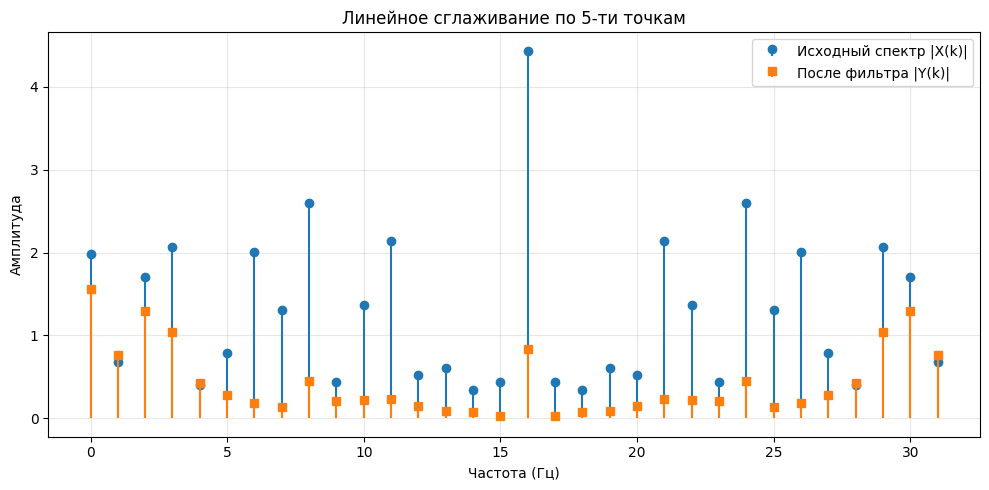

In [213]:
plt.figure(figsize=(10, 5))
plt.title('Линейное сглаживание по 5-ти точкам')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_5_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

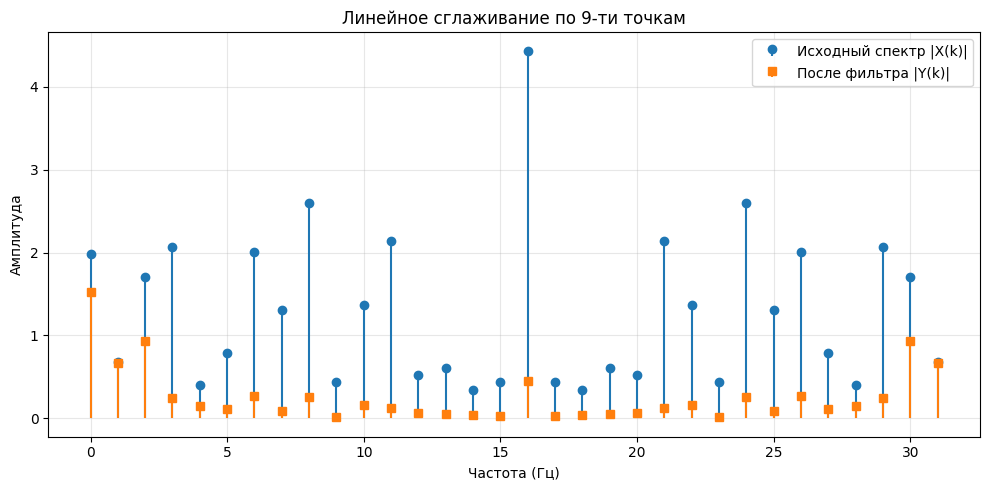

In [214]:
plt.figure(figsize=(10, 5))
plt.title('Линейное сглаживание по 9-ти точкам')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_9_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

In [215]:
t = np.linspace(0, 1, 100)
omega = 2 * np.pi * t

H5 = (1/5) * (1 + 2*np.cos(omega) + 2*np.cos(2*omega))
H9 = (1/9) * (1 + 2*np.cos(omega) + 2*np.cos(2*omega)
                     + 2*np.cos(3*omega) + 2*np.cos(4*omega))

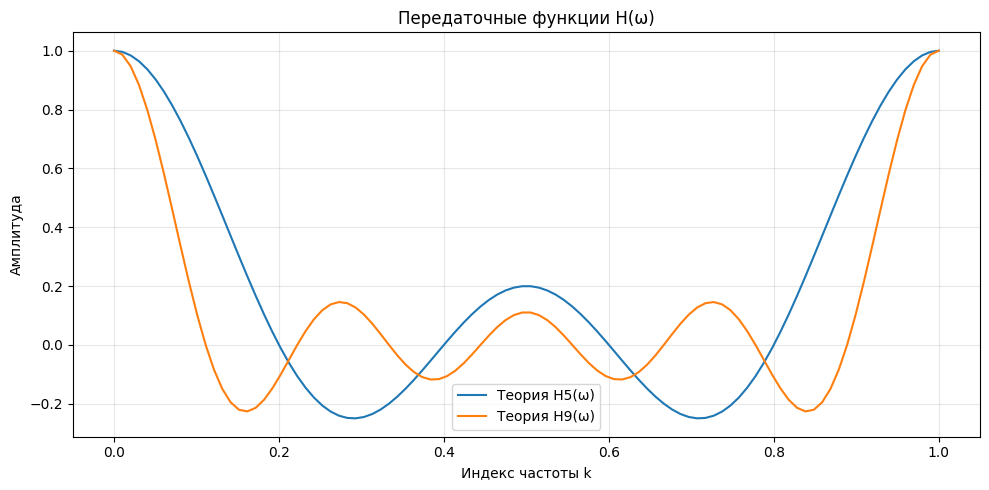

In [216]:
plt.figure(figsize=(10,5))
plt.title('Передаточные функции H(ω)')
plt.grid(True, alpha=0.3)
plt.xlabel('Индекс частоты k')
plt.ylabel('Амплитуда')

plt.plot(t, H5, label='Теория H5(ω)')
plt.plot(t, H9, label='Теория H9(ω)')

plt.legend()
plt.tight_layout()
plt.show()

При сравнении графиков видно, что в области нулевой частоты и вблизи частоты $\omega = \pi$ передаточной функции обоих фильтров близка к 1, из-за чего сигналы почти не подавляются, а между низкими и предельными высокими частотами происходит сильное подавление, причем при 9-ти точкам подавление немного сильнее.

### Задание 8
 Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона)

#### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

In [217]:
h_diff = np.array([-0.5, 0.0, 0.5])
y_diff = np.convolve(x_discrete, h_diff, mode='same')

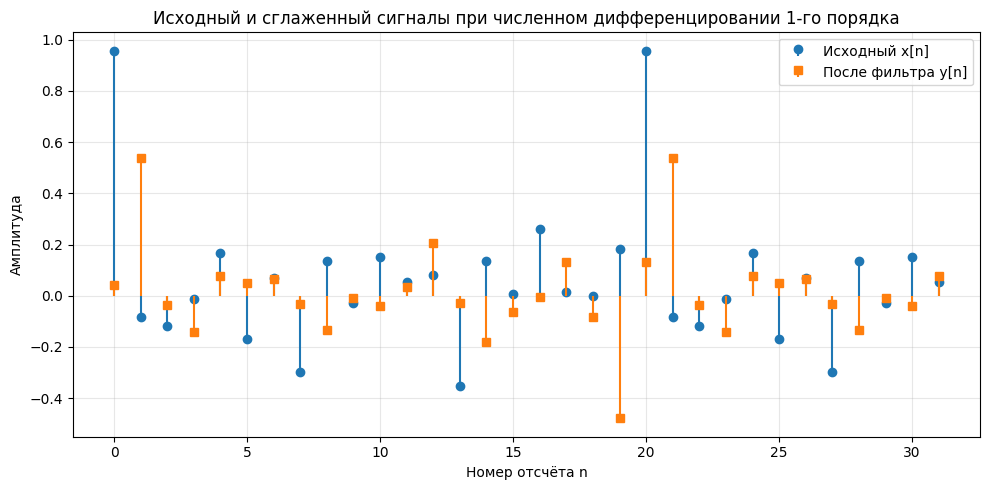

In [218]:
plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы при численном дифференцировании 1-го порядка')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y_diff, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

In [219]:
n = np.arange(NumPoints)
k = np.arange(NumPoints)
W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / NumPoints)

X = W @ x_discrete
Y_diff = W @ y_diff

X_mag = np.abs(X)
Y_diff_mag = np.abs(Y_diff)

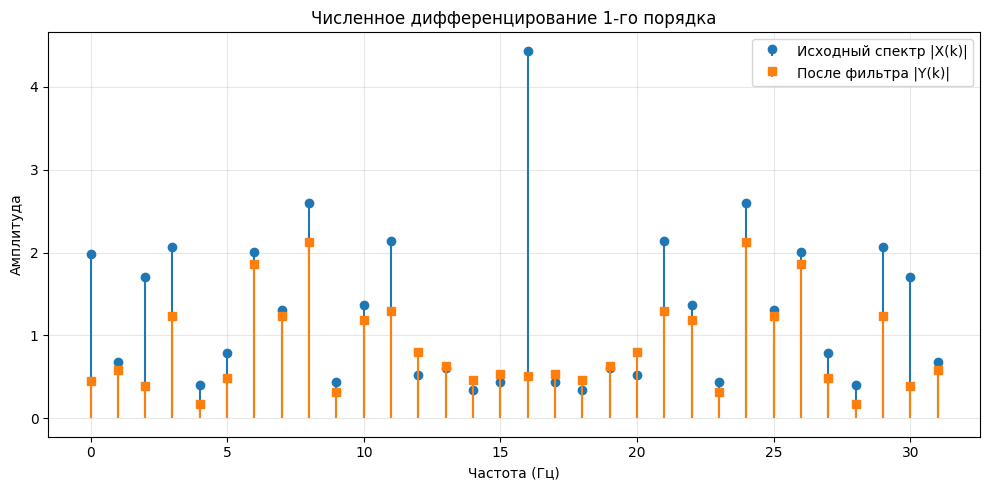

In [220]:
plt.figure(figsize=(10, 5))
plt.title('Численное дифференцирование 1-го порядка')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_diff_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

In [221]:
H_diff = np.sin(omega)

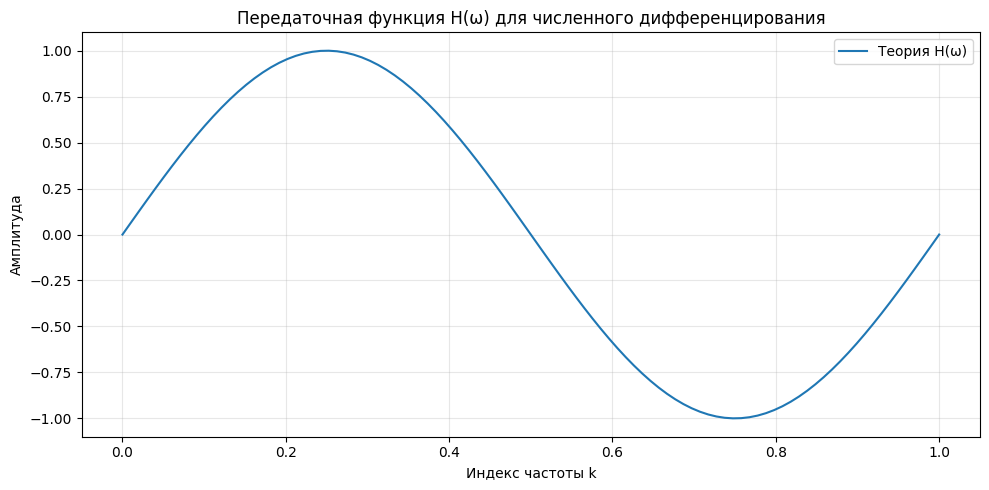

In [222]:
plt.figure(figsize=(10,5))
plt.title('Передаточная функция H(ω) для численного дифференцирования')
plt.grid(True, alpha=0.3)
plt.xlabel('Индекс частоты k')
plt.ylabel('Амплитуда')

plt.plot(t, H_diff, label='Теория H(ω)')

plt.legend()
plt.tight_layout()
plt.show()

Спектры до и после фильтрации показывают, что низкочастотные компоненты исходного сигнала сильно подавляются на выходе, тогда как компоненты в средней части частотного диапазона ослабляются значительно меньше. Это соответствует форме $H(\omega)$, которая мала на низких частотах и максимальна примерно посередине диапазона.

#### Дискретный фильтр, соответствующий численному интегрированию прямоугольников, трапеций, Симпсона

In [223]:
s = x_discrete.copy()
N = len(s)

y_rect = np.zeros_like(s, dtype=float)
y_trap = np.zeros_like(s, dtype=float)
y_simp = np.zeros_like(s, dtype=float)

s_mid = 0.5 * (s[:-1] + s[1:])

for n in range(N - 1):
    y_rect[n+1] = y_rect[n] + s_mid[n]
    y_trap[n+1] = y_trap[n] + 0.5 * (s[n] + s[n+1])
    if (n > 0):
      y_simp[n+1] = y_simp[n-1] + (s[n-1] + 4*s[n] + s[n+1]) / 3.0

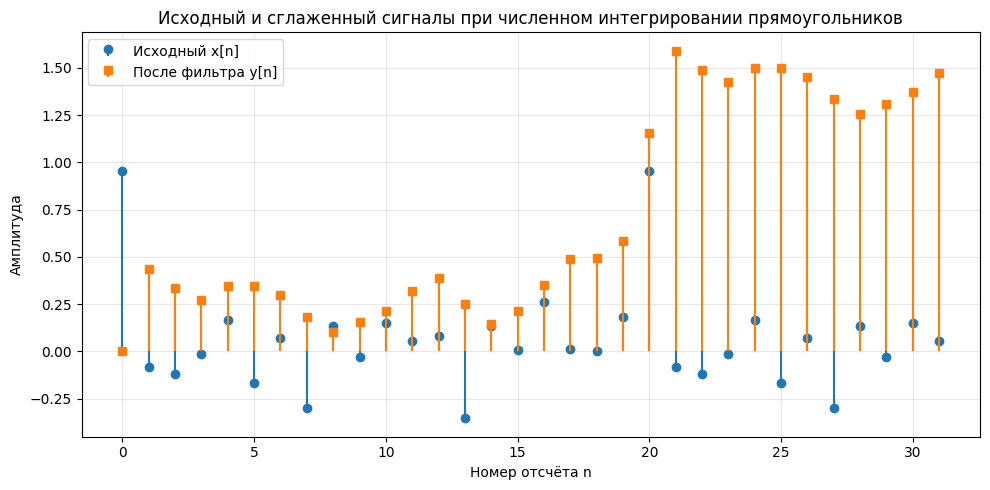

In [224]:
n = np.arange(len(x_discrete))

plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы при численном интегрировании прямоугольников')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y_rect, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

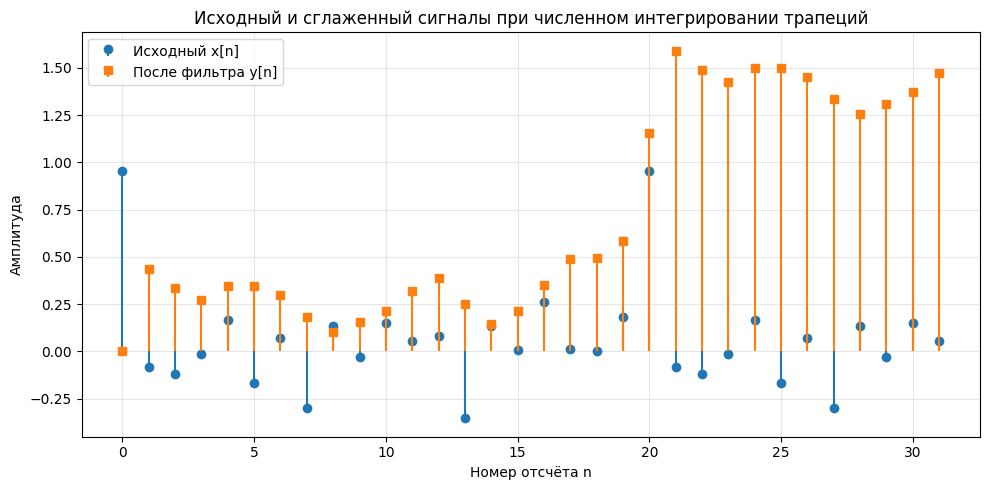

In [225]:
plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы при численном интегрировании трапеций')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y_trap, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

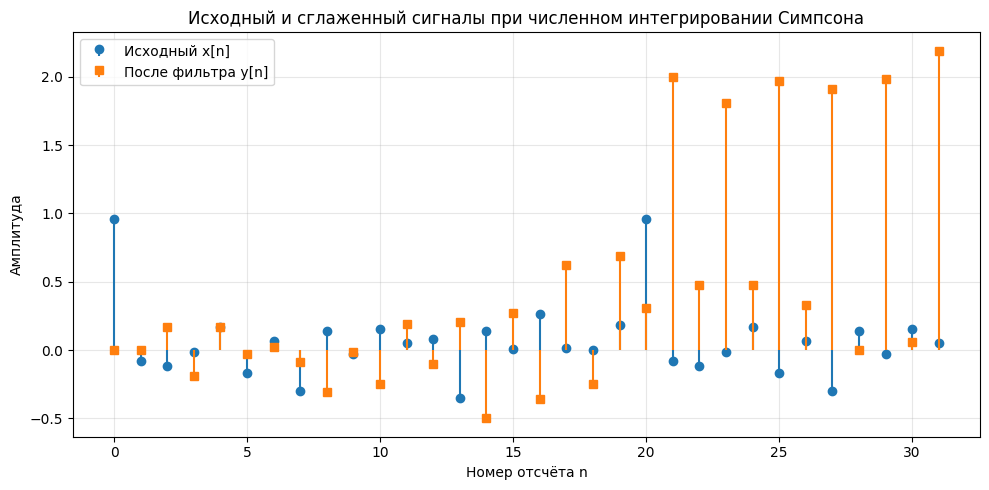

In [226]:
plt.figure(figsize=(10, 5))
plt.title('Исходный и сглаженный сигналы при численном интегрировании Симпсона')
plt.grid(True, alpha=0.3)
plt.xlabel('Номер отсчёта n')
plt.ylabel('Амплитуда')

plt.stem(n, x_discrete, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный x[n]')
plt.stem(n, y_simp, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='После фильтра y[n]')

plt.legend()
plt.tight_layout()
plt.show()

In [227]:
n = np.arange(NumPoints)
k = np.arange(NumPoints)
W = np.exp(-1j * 2 * np.pi * np.outer(k, n) / NumPoints)

X = W @ x_discrete
Y_rect = W @ y_rect
Y_trap = W @ y_trap
Y_simp = W @ y_simp

X_mag = np.abs(X)
Y_rect_mag = np.abs(Y_rect)
Y_trap_mag = np.abs(Y_trap)
Y_simp_mag = np.abs(Y_simp)

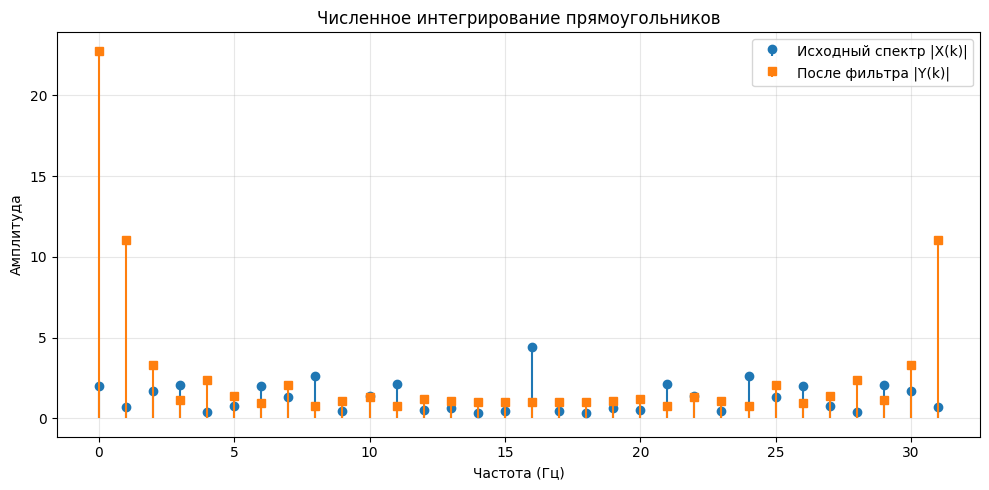

In [228]:
plt.figure(figsize=(10, 5))
plt.title('Численное интегрирование прямоугольников')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_rect_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

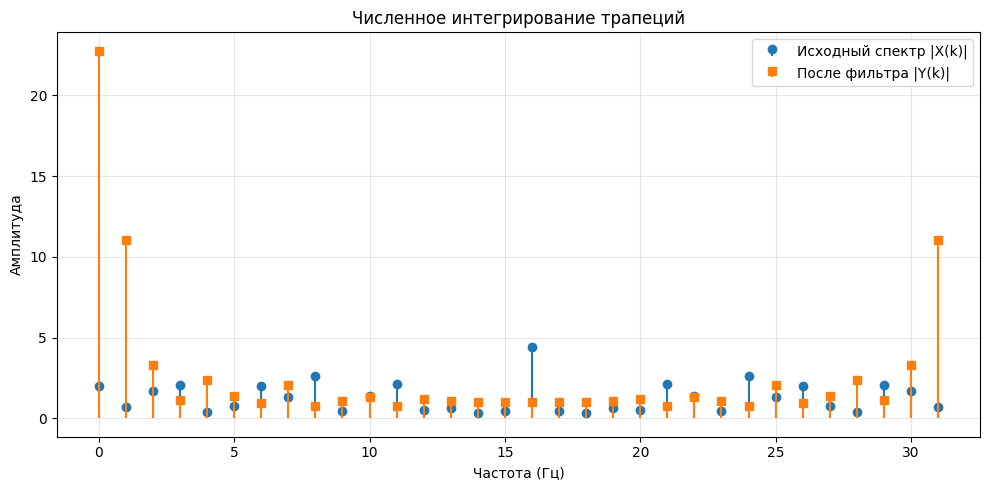

In [229]:
plt.figure(figsize=(10, 5))
plt.title('Численное интегрирование трапеций')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_trap_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

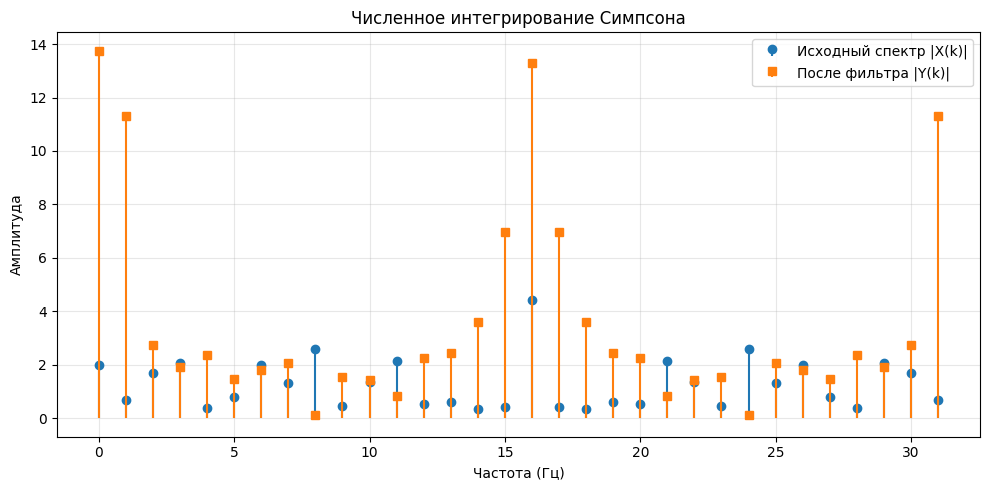

In [230]:
plt.figure(figsize=(10, 5))
plt.title('Численное интегрирование Симпсона')
plt.grid(True, alpha=0.3)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.stem(X_mag, linefmt='C0-', markerfmt='C0o',
         basefmt=' ', label='Исходный спектр |X(k)|')
plt.stem(Y_simp_mag, linefmt='C1-', markerfmt='C1s',
         basefmt=' ', label='После фильтра |Y(k)|')

plt.legend()
plt.tight_layout()
plt.show()

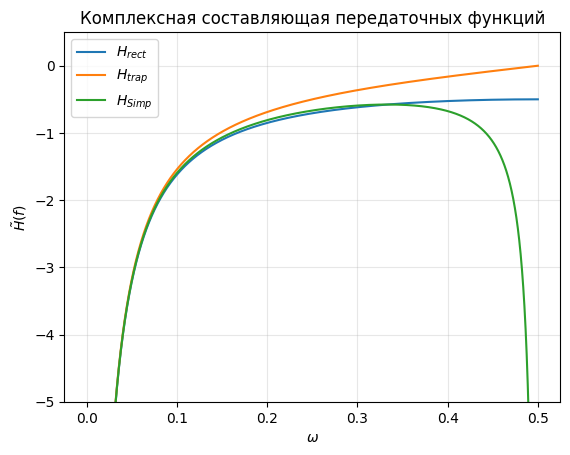

In [231]:
eps = 1e-5
N = 5000
F = np.linspace(eps, 0.5 - eps, N, dtype=np.float64)
W = 2*np.pi*F

H_rect = 1 / (2 * 1j * np.sin(0.5 * W))
H_trap = (np.cos(0.5 * W)) / (2 *1j * np.sin(0.5 * W))
H_simp = (2 + np.cos(W)) / (3 *1j * np.sin(W))

plt.plot(F, np.imag(H_rect), label="$H_{rect}$")
plt.plot(F, np.imag(H_trap), label="$H_{trap}$")
plt.plot(F, np.imag(H_simp), label="$H_{Simp}$")
plt.ylim((-5, 0.5))
plt.xlabel("$\\omega$")
plt.ylabel("$\\tilde{H}(f)$")
plt.grid(True, alpha=0.3)
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

Во всех трёх случаях экспериментальные спектры и вид комплексных передаточных функций подтверждают, что рассматриваемые фильтры действуют как низкочастотные интегрирующие звенья: они резко усиливают низкие частоты и подавляют быстрые колебания, а также метод Симпсона усиливает высокие частоты.

## Выводы

В ходе выполнения лабораторной работы была реализована фильтрация дискретного сигнала на основе формул численного дифференцирования и интегрирования, а также с использованием линейного сглаживания. Для исходного и отфильтрованных сигналов были получены и проанализированы спектры с помощью дискретного преобразования Фурье. \
\
Линейные сглаживающие фильтры по 5 и 9 точкам ведут себя как низкочастотные: они практически не искажают низкие частоты, но заметно подавляют средние и высокие, за исключением предельно высоких, причём 9‑точечный фильтр сглаживает сильнее и сильнее размывает резкие детали сигнала. \
\
Дискретный фильтр численного дифференцирования 1‑го порядка сильно подавляет низкочастотные компоненты исходного сигнала на выходе, тогда как компоненты в средней части частотного диапазона ослабляются значительно меньше. \
\
Интегрирующие фильтры (прямоугольников, трапеций, Симпсона) реализуют низкочастотные интеграторы: они резко усиливают низкие частоты и подавляют быстрые колебания, кроме того метод Симпсона усиливает высокие частоты.